In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

TRADING_DAYS = 252

In [2]:
def get_price_history(ticker, start='2020-01-01', end='2025-01-01'):
    data = yf.download(ticker, start=start, end=end, auto_adjust=True, progress=False)
    prices = data['Close'].dropna()
    return prices

In [3]:
def estimate_gbm_params(prices):
    log_rets = np.log(prices / prices.shift(1)).dropna()
    mu_daily = log_rets.mean()
    sigma_daily = log_rets.std()
    mu_annual = float(mu_daily * TRADING_DAYS)
    sigma_annual = float(sigma_daily * np.sqrt(TRADING_DAYS))
    return mu_annual, sigma_annual, log_rets

In [4]:
def monte_carlo_paths(S0, mu, sigma, days=252, sims=10000):
    dt = 1/TRADING_DAYS
    Z = np.random.normal(0,1,(days, sims))
    drift = (mu - 0.5*sigma**2)*dt
    diffusion = sigma*np.sqrt(dt)*Z
    log_paths = np.vstack([np.log(S0)*np.ones((1,sims)),
                           np.log(S0) + np.cumsum(drift+diffusion,axis=0)])
    return np.exp(log_paths)

/tmp/ipykernel_14504/613959656.py:5: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  mu_annual = float(mu_daily * TRADING_DAYS)
/tmp/ipykernel_14504/613959656.py:6: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  sigma_annual = float(sigma_daily * np.sqrt(TRADING_DAYS))


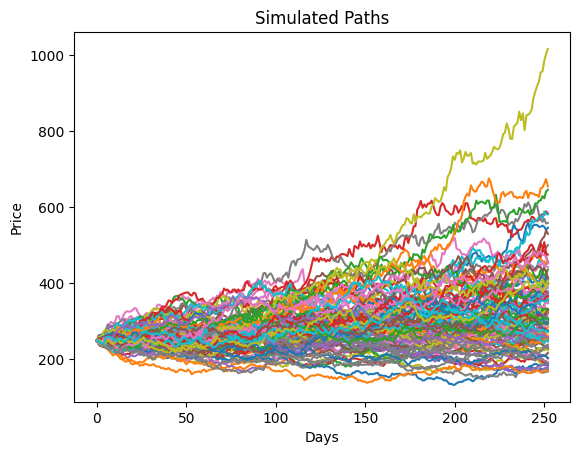

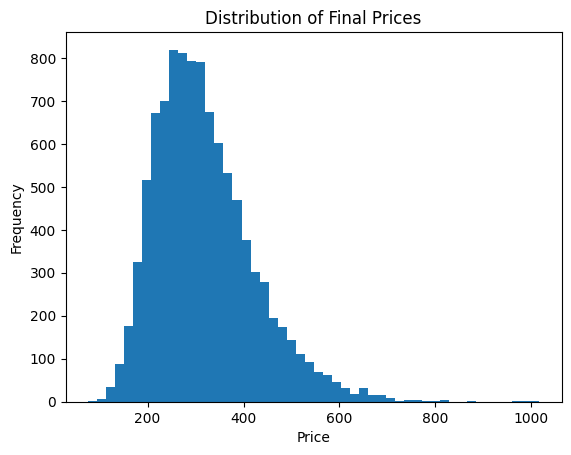

Mean final price: 318.9711330126595


In [7]:
ticker='AAPL'
prices=get_price_history(ticker)
S0 = float(prices.iloc[-1].item())
mu,sigma,lr=estimate_gbm_params(prices)
paths=monte_carlo_paths(S0,mu,sigma)

# Plot simulated paths
plt.plot(paths[:,:100])
plt.title('Simulated Paths')
plt.xlabel("Days")
plt.ylabel("Price")
plt.show()

# Plot distribution of final prices
final=paths[-1]
plt.hist(final,bins=50)
plt.title('Distribution of Final Prices')
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

print('Mean final price:', final.mean())